In [1]:
# -*- coding: utf-8 -*-
# This code is written in Python 3.7. To install the required packages, run the following commands:
# pip install pandas numpy matplotlib seaborn scikit-learn sympy
# This code is applicable to the mems dataset.
# implemented Advanced Ensamble CatBoostClassifier.

import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
import time 
import numpy as np




In [2]:
# Load mems dataset
df = pd.read_csv('/home/ibibers@ads.iu.edu/IOT/IOT_Datasets/mems_dataset.csv')

# Drop duplicates
df = df.drop_duplicates(keep='first')

# Drop columns that have just one unique value
one_value = df.columns[df.nunique() == 1]
df = df.drop(columns = one_value, axis=1)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21563 entries, 0 to 21575
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       21563 non-null  float64
 1   y       21563 non-null  float64
 2   z       21563 non-null  float64
 3   label   21563 non-null  int64  
dtypes: float64(3), int64(1)
memory usage: 842.3 KB


In [3]:
# X-axis: Represents acceleration along the horizontal axis.
# Y-axis: Represents acceleration along the vertical axis.
# Z-axis: Represents acceleration along the depth axis.

# labels 
#1. Normal: This label represents the state of the machine when it is operating under normal conditions, without any significant mechanical imbalance or impending failure.
#2. Near-failure: This label indicates that the machine is experiencing conditions that suggest it is close to a failure state. These conditions may include early signs of mechanical imbalance or other issues that could lead to failure if not addressed.
#3. Failure: This label is assigned when the machine has reached a state of failure, where it is no longer functioning as intended due to mechanical issues or other problems.

# Extract subsample of data
print (" Extract subsample of data: ")
print(df['label'].value_counts())

 Extract subsample of data: 
label
1    10955
2     5771
3     4837
Name: count, dtype: int64


In [4]:
dropped_df = ['label']
X = df.drop(dropped_df, axis=1)
y = df['label']


In [5]:
start_time = time.time()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#  CatBoost Classifier

cat = CatBoostClassifier()

# Train 
start_train_time = time.time()
cat.fit(X_train, y_train)
train_time = time.time() - start_train_time

# Make predictions on the test set
start_pred_time = time.time()  
y_pred = cat.predict(X_test)
pred_time = time.time() - start_pred_time

total_time = time.time() - start_time


Learning rate set to 0.090875
0:	learn: 1.0411252	total: 55.2ms	remaining: 55.1s
1:	learn: 0.9929097	total: 61.2ms	remaining: 30.6s
2:	learn: 0.9534011	total: 67.1ms	remaining: 22.3s
3:	learn: 0.9199618	total: 72.8ms	remaining: 18.1s
4:	learn: 0.8897308	total: 78.3ms	remaining: 15.6s
5:	learn: 0.8637027	total: 83.7ms	remaining: 13.9s
6:	learn: 0.8424582	total: 89.1ms	remaining: 12.6s
7:	learn: 0.8229092	total: 93.9ms	remaining: 11.6s
8:	learn: 0.8057702	total: 98.9ms	remaining: 10.9s
9:	learn: 0.7904500	total: 104ms	remaining: 10.3s
10:	learn: 0.7763944	total: 109ms	remaining: 9.8s
11:	learn: 0.7648959	total: 114ms	remaining: 9.42s
12:	learn: 0.7531240	total: 119ms	remaining: 9.05s
13:	learn: 0.7430879	total: 124ms	remaining: 8.74s
14:	learn: 0.7343353	total: 129ms	remaining: 8.45s
15:	learn: 0.7261710	total: 133ms	remaining: 8.2s
16:	learn: 0.7191439	total: 138ms	remaining: 7.97s
17:	learn: 0.7122114	total: 143ms	remaining: 7.79s
18:	learn: 0.7071087	total: 147ms	remaining: 7.61s
19:	

In [6]:
print("Time taken for training:{:f} seconds".format(train_time))
print("Time taken for prediction: {:f} seconds".format(pred_time))
print("Total time taken:{:f} seconds".format(total_time))

Time taken for training:4.359497 seconds
Time taken for prediction: 0.011429 seconds
Total time taken:4.376446 seconds


In [7]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7175761323233885


In [8]:

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           1       0.69      0.83      0.76      3283
           2       0.80      0.81      0.80      1696
           3       0.65      0.36      0.47      1490

    accuracy                           0.72      6469
   macro avg       0.72      0.67      0.68      6469
weighted avg       0.71      0.72      0.70      6469



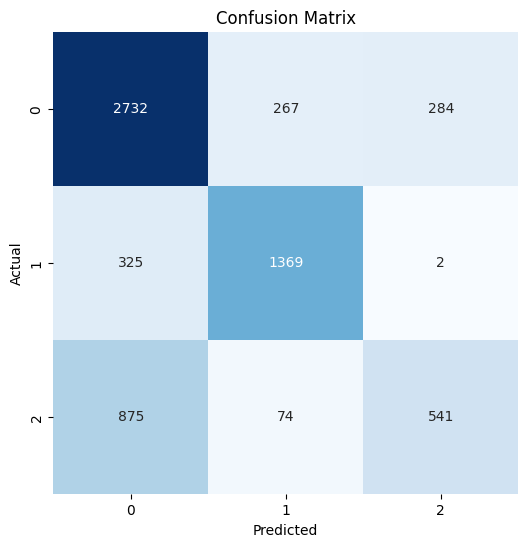

In [10]:

# Confusion matrix with string labels
conf_mat = confusion_matrix(y_test, y_pred)


# Plotting the Confusion Matrix with class labels
plt.figure(figsize=(6, 6))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
# importances of features in the decision tree model
importance = cat.feature_importances_
importance_dict = dict(zip(X.columns.values, importance))
sorted_importance = dict(
    sorted(importance_dict.items(), key=lambda x: x[1], reverse=True))

plt.figure(figsize=(7, 13))
sns.barplot(x=list(sorted_importance.values()), y=list(
    sorted_importance.keys()), palette='cubehelix')
plt.xlabel('Importance Value')
plt.ylabel('Feature Name')
plt.title('Feature Importance in Random Forest Classifier')
plt.show()